In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# Run First - nltk.download('punkt')

plt.style.use('ggplot')

In [126]:
df = pd.read_csv(r"F:\Prices\reviews.csv")
print(df.shape)

(685, 5)


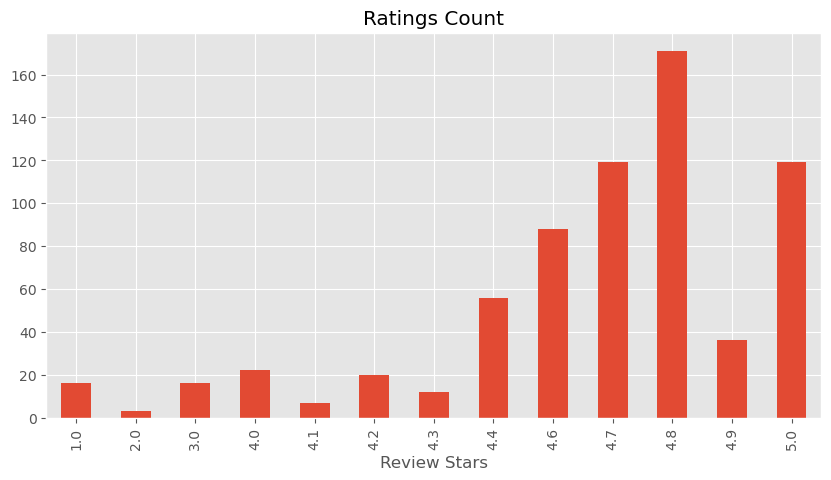

In [127]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Ratings Count',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [128]:
example = df['Review'][25]
print(example)

Amazing style, quality and price! I am beyond happy. Thank you


In [129]:
# Run First - nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:20]

['Amazing',
 'style',
 ',',
 'quality',
 'and',
 'price',
 '!',
 'I',
 'am',
 'beyond',
 'happy',
 '.',
 'Thank',
 'you']

In [130]:
# Run First - nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(tokens)
tagged[:20]

[('Amazing', 'JJ'),
 ('style', 'NN'),
 (',', ','),
 ('quality', 'NN'),
 ('and', 'CC'),
 ('price', 'NN'),
 ('!', '.'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('beyond', 'IN'),
 ('happy', 'JJ'),
 ('.', '.'),
 ('Thank', 'NN'),
 ('you', 'PRP')]

In [131]:
# Run First - nltk.download('maxent_ne_chunker')
# Run First - nltk.download('words')

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Amazing/JJ
  style/NN
  ,/,
  quality/NN
  and/CC
  price/NN
  !/.
  I/PRP
  am/VBP
  beyond/IN
  happy/JJ
  ./.
  Thank/NN
  you/PRP)


In [132]:
# Using Vader
# VADER - VADER (Valence Aware Dictionary and sEntiment Reasoner)

# Run First - nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [133]:
# Test Positive Sentence

sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [134]:
# Test Negative Sentence

sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [135]:
# Testing our sentence

print(f"Reveiw: {example}")
sia.polarity_scores(example)

Reveiw: Amazing style, quality and price! I am beyond happy. Thank you


{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.8832}

In [136]:
df

,Website,Sku,Rating,Review,Date Added
0,Livingspaces,248772,4.6,"Clean look, quality piece. Great upgrade to the room",06/18/2023
1,Livingspaces,248772,4.6,I love how modern this nightstand is. I got the whole set and everything goes perfectly with my decor.,06/18/2023
2,Livingspaces,248772,4.6,Great service. They found just what I was looking for. Delivery was fast and free.,06/18/2023
3,Livingspaces,248772,4.6,Love this spacious and beautiful nightstand! The drawers have plenty of room and are sturdy and will last a long time.,06/18/2023
4,Livingspaces,248772,4.6,Spacious and modern! Goes with my Grey bed as a nightstand and also as a side table next to my sofa.,06/18/2023
...,...,...,...,...,...
680,Livingspaces,282656,4.1,Perfect table for our outdoor space. We accented with a different bench and they were very helpful in the store assisting us with moving things around so we could see the finished product,06/23/2023
681,Livingspaces,284101,5.0,This table is so pretty! It’s solidly constructed and heavy in weight. The top is easy to clean and offers marble veining. Gives me just the look I wanted for our backyard!,06/23/2023
682,Rcwilley,112156657,4.0,Got this so we could eat together on one table outside,06/23/2023
683,Rcwilley,112072925,5.0,It is a good size and easy to put together.,06/23/2023


In [137]:
# Run the polarity score on the entire dataset
# Using a progress bar to show proccessing progress.

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = i  # Use the DataFrame index as the identifier
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/685 [00:00<?, ?it/s]

In [138]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.0,0.507,0.493,0.7783
1,0.0,0.641,0.359,0.8555
2,0.0,0.619,0.381,0.8126
3,0.0,0.682,0.318,0.8553
4,0.0,0.923,0.077,0.1260
...,...,...,...,...
680,0.0,0.815,0.185,0.7778
681,0.0,0.691,0.309,0.9022
682,0.0,1.000,0.000,0.0000
683,0.0,0.547,0.453,0.7003


In [139]:
# Since I am dumb and didnt add an ID column into my data
# We are using our df index to mrege

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
merged_df = df.merge(vaders, how='left', left_index=True, right_index=True)
vaders = merged_df


In [140]:
vaders


,Website,Sku,Rating,Review,Date Added,Id,neg,neu,pos,compound
0,Livingspaces,248772,4.6,"Clean look, quality piece. Great upgrade to the room",06/18/2023,0,0.0,0.507,0.493,0.7783
1,Livingspaces,248772,4.6,I love how modern this nightstand is. I got the whole set and everything goes perfectly with my decor.,06/18/2023,1,0.0,0.641,0.359,0.8555
2,Livingspaces,248772,4.6,Great service. They found just what I was looking for. Delivery was fast and free.,06/18/2023,2,0.0,0.619,0.381,0.8126
3,Livingspaces,248772,4.6,Love this spacious and beautiful nightstand! The drawers have plenty of room and are sturdy and will last a long time.,06/18/2023,3,0.0,0.682,0.318,0.8553
4,Livingspaces,248772,4.6,Spacious and modern! Goes with my Grey bed as a nightstand and also as a side table next to my sofa.,06/18/2023,4,0.0,0.923,0.077,0.1260
...,...,...,...,...,...,...,...,...,...,...
680,Livingspaces,282656,4.1,Perfect table for our outdoor space. We accented with a different bench and they were very helpful in the store assisting us with moving things around so we could see the finished product,06/23/2023,680,0.0,0.815,0.185,0.7778
681,Livingspaces,284101,5.0,This table is so pretty! It’s solidly constructed and heavy in weight. The top is easy to clean and offers marble veining. Gives me just the look I wanted for our backyard!,06/23/2023,681,0.0,0.691,0.309,0.9022
682,Rcwilley,112156657,4.0,Got this so we could eat together on one table outside,06/23/2023,682,0.0,1.000,0.000,0.0000
683,Rcwilley,112072925,5.0,It is a good size and easy to put together.,06/23/2023,683,0.0,0.547,0.453,0.7003


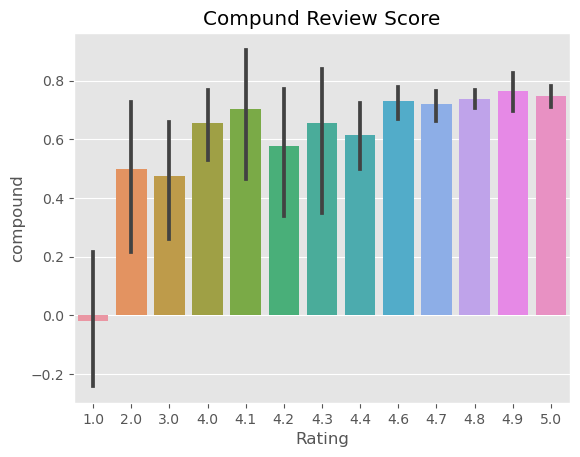

In [141]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Review Score')
plt.show()

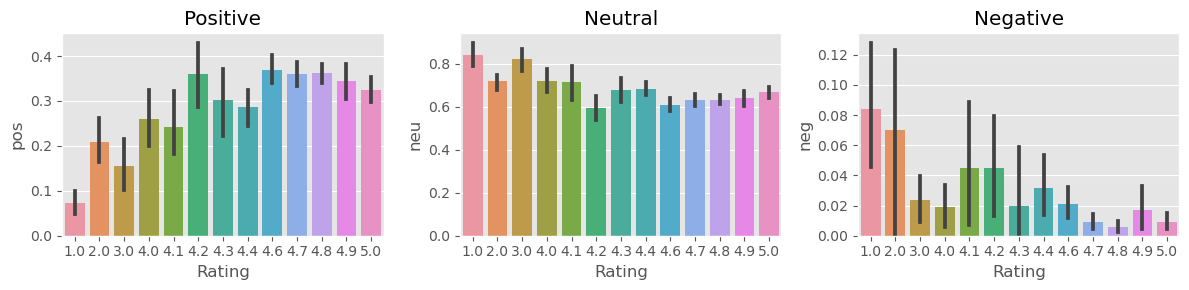

In [142]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

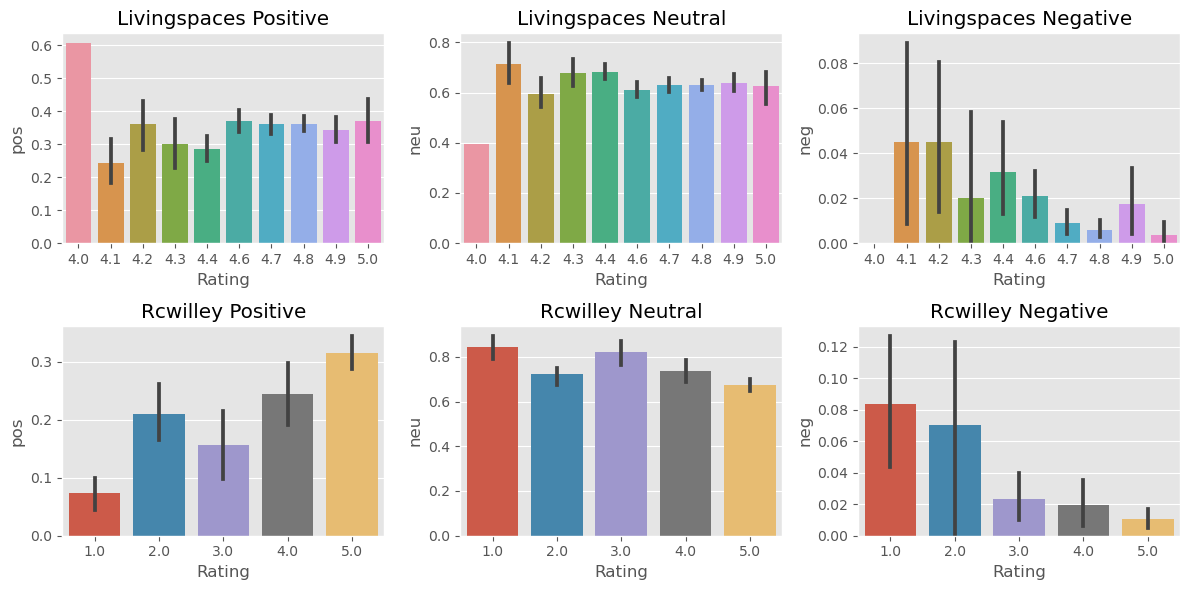

In [143]:
# Separate the charts by website

livingspaces_vaders = vaders[vaders['Website'] == 'Livingspaces']
rcwilley_vaders = vaders[vaders['Website'] == 'Rcwilley']

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
sns.barplot(data=livingspaces_vaders, x='Rating', y='pos', ax=axs[0, 0])
sns.barplot(data=livingspaces_vaders, x='Rating', y='neu', ax=axs[0, 1])
sns.barplot(data=livingspaces_vaders, x='Rating', y='neg', ax=axs[0, 2])
axs[0, 0].set_title('Livingspaces Positive')
axs[0, 1].set_title('Livingspaces Neutral')
axs[0, 2].set_title('Livingspaces Negative')

sns.barplot(data=rcwilley_vaders, x='Rating', y='pos', ax=axs[1, 0])
sns.barplot(data=rcwilley_vaders, x='Rating', y='neu', ax=axs[1, 1])
sns.barplot(data=rcwilley_vaders, x='Rating', y='neg', ax=axs[1, 2])
axs[1, 0].set_title('Rcwilley Positive')
axs[1, 1].set_title('Rcwilley Neutral')
axs[1, 2].set_title('Rcwilley Negative')

plt.tight_layout()
plt.show()


## Roberta Language Model

* Roberta is a  Model trained on large amount of data
* Transformer models like Roberta account for the words but also the context related to other words

In [144]:
# Our required Imports

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [145]:
# Define and import our Model
# the first time you run this it will take a while to download the model

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [146]:
# Example VADER results again

print(example)
sia.polarity_scores(example)

Amazing style, quality and price! I am beyond happy. Thank you


{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.8832}

In [147]:
# Run our data through the Roberta Model

new_encoded_text = tokenizer(example, return_tensors='pt')
output = model(**new_encoded_text)

# detach and remove our output from a tensor
scores = output[0][0].detach().numpy()
# apply the softmax to or scores
scores = softmax(scores)

scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

# Showing our original example compared to the VADER scores
print(example)
print('\n', scores_dict)
sia.polarity_scores(example)

Amazing style, quality and price! I am beyond happy. Thank you

 {'roberta_neg': 0.002002828, 'roberta_neu': 0.005678227, 'roberta_pos': 0.9923189}


{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.8832}

In [148]:
# define our function to have Roberta score our input text

def polarity_scores_roberta(example):
    new_encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**new_encoded_text)

    # detach and remove our output from a tensor
    scores = output[0][0].detach().numpy()
    # apply the softmax to or scores
    scores = softmax(scores)

    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [149]:
# Run our database through the Roberta model

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = i  # Use the DataFrame index as the identifier
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)
        # Combine our two databases

        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Unable to run id {myid}')


  0%|          | 0/685 [00:00<?, ?it/s]

In [150]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left', left_index=True, right_index=True)

In [151]:
# drop our index since we got multiple
results_df = results_df.reset_index(drop=True)


In [152]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Website,Sku,Rating,Review,Date Added
0,0,0.0,0.507,0.493,0.7783,0.002119,0.022620,0.975261,Livingspaces,248772,4.6,"Clean look, quality piece. Great upgrade to the room",06/18/2023
1,1,0.0,0.641,0.359,0.8555,0.001619,0.009368,0.989013,Livingspaces,248772,4.6,I love how modern this nightstand is. I got the whole set and everything goes perfectly with my decor.,06/18/2023
2,2,0.0,0.619,0.381,0.8126,0.001879,0.015664,0.982457,Livingspaces,248772,4.6,Great service. They found just what I was looking for. Delivery was fast and free.,06/18/2023
3,3,0.0,0.682,0.318,0.8553,0.001136,0.008169,0.990695,Livingspaces,248772,4.6,Love this spacious and beautiful nightstand! The drawers have plenty of room and are sturdy and will last a long time.,06/18/2023
4,4,0.0,0.923,0.077,0.1260,0.002880,0.261302,0.735818,Livingspaces,248772,4.6,Spacious and modern! Goes with my Grey bed as a nightstand and also as a side table next to my sofa.,06/18/2023


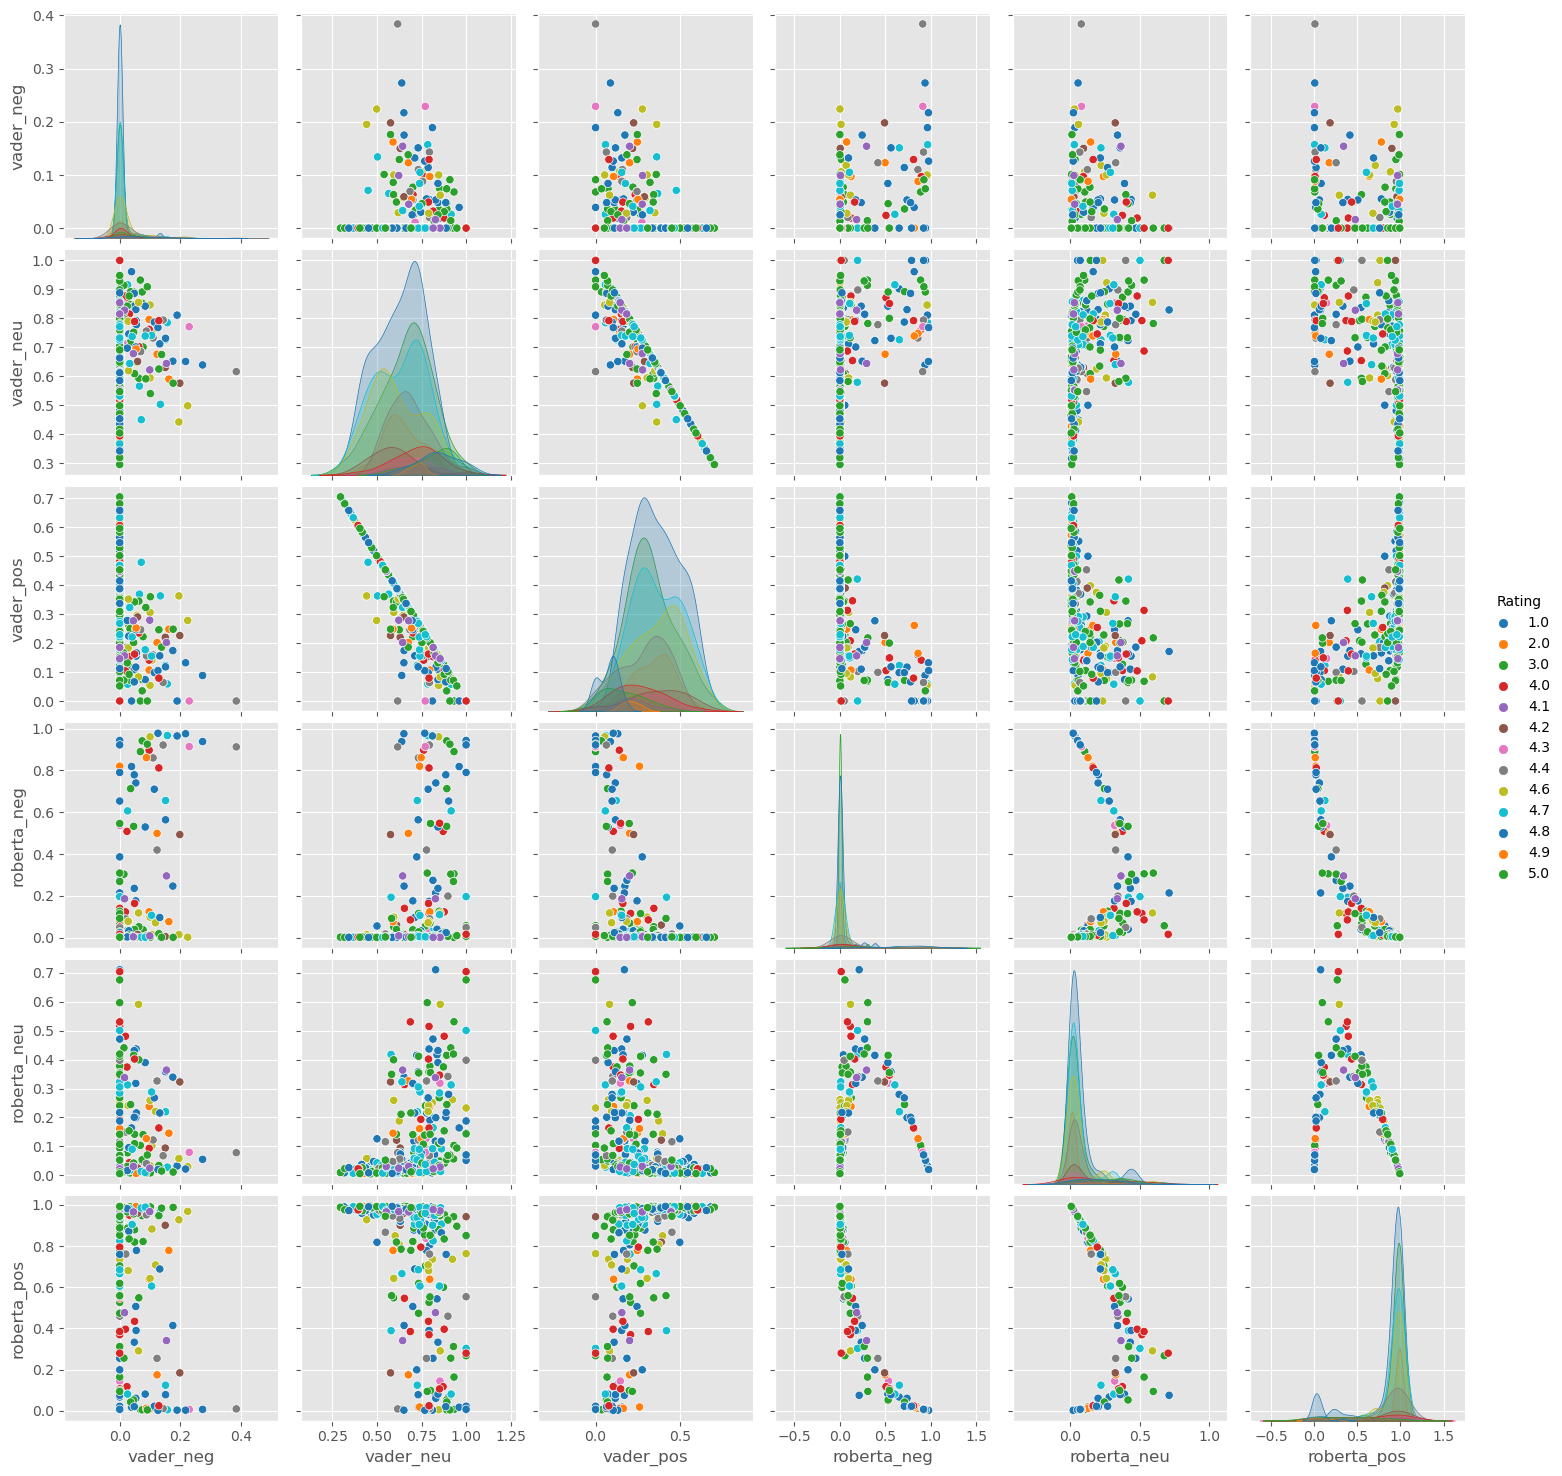

In [153]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Rating',
             palette='tab10')
plt.show()


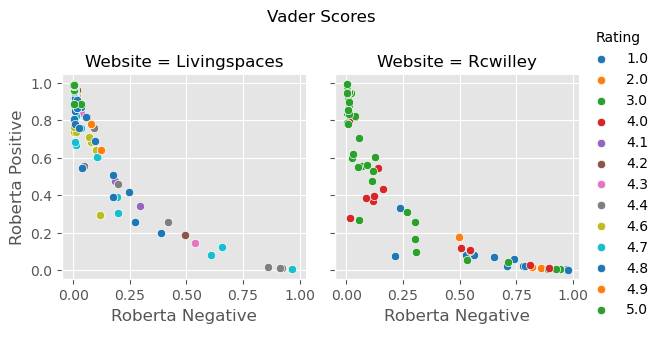

In [154]:
g = sns.FacetGrid(data=results_df, col='Website', hue='Rating', palette='tab10')
g.map_dataframe(sns.scatterplot, x='roberta_neg', y='roberta_pos')
g.set_axis_labels('Roberta Negative', 'Roberta Positive')
g.add_legend()
g.fig.suptitle('Vader Scores', y=1.1)
plt.show()


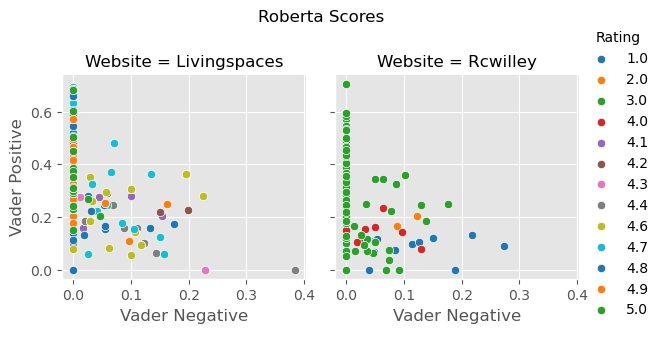

In [155]:
g = sns.FacetGrid(data=results_df, col='Website', hue='Rating', palette='tab10')
g.map_dataframe(sns.scatterplot, x='vader_neg', y='vader_pos')
g.set_axis_labels('Vader Negative', 'Vader Positive')
g.add_legend()
g.fig.suptitle('Roberta Scores', y=1.1)
plt.show()


In [161]:
# Lets look at some examples where the scores are opposite of what they should be

# Set this so we can see all of the review Text
pd.set_option('display.max_colwidth', 1000)

# The lowest scores on living spaces were 4.1. But lets look at the 4.2 values.
results_df.query('Rating == 4.2').sort_values('roberta_pos', ascending=False)



,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Website,Sku,Rating,Review,Date Added
48,48,0.000,0.460,0.540,0.8897,0.001576,0.005989,0.992436,Livingspaces,277209,4.2,I love this bedside table! So spacious and looks very clean and nice,06/18/2023
291,291,0.000,0.541,0.459,0.8585,0.002022,0.006359,0.991619,Livingspaces,274614,4.2,"I love this chest of drawers! The color, material and size are perfect!",06/19/2023
292,292,0.000,0.680,0.320,0.7644,0.001358,0.007855,0.990787,Livingspaces,274614,4.2,I love this piece its not too dark not too light! Goes well with all my furniture,06/19/2023
324,324,0.000,0.516,0.484,0.8176,0.001567,0.008885,0.989549,Livingspaces,281441,4.2,Perfect for my guest room and the quality is amazing,06/19/2023
521,521,0.000,0.516,0.484,0.8176,0.001567,0.008885,0.989549,Livingspaces,281441,4.2,Perfect for my guest room and the quality is amazing,06/20/2023
51,51,0.000,0.452,0.548,0.8585,0.001285,0.010018,0.988696,Livingspaces,277209,4.2,Perfect size for small spaces! Love the gold accents!,06/18/2023
295,295,0.011,0.714,0.275,0.9874,0.002011,0.009605,0.988384,Livingspaces,274614,4.2,"I looked long and hard for a dresser that would fit into a small bedroom yet provide the maximum amount of storage and finally came across this beauty. This is an absolutely great piece of furniture! Lots of storage, soft and easy closing drawers, solid construction and a lovely traditional yet modern style. \nThe larger, matching nightstand was also purchased and it is awesome too. \nDelivery was prompt and easy and i will continue to shop with Living Spaces.\n\nI can’t say enough about the look and quality of this furniture and it does make me happy to wake up and see my beautiful, new bedroom look.",06/19/2023
321,321,0.000,0.413,0.587,0.9080,0.002715,0.012340,0.984945,Livingspaces,281441,4.2,Very nice quality and great storage. I love the style and color .,06/19/2023
518,518,0.000,0.413,0.587,0.9080,0.002715,0.012340,0.984945,Livingspaces,281441,4.2,Very nice quality and great storage. I love the style and color .,06/20/2023
53,53,0.000,0.533,0.467,0.7845,0.001497,0.019778,0.978725,Livingspaces,277209,4.2,Looks nice and seems sturdy. Nice colors and makes room feel fresh.,06/18/2023


In [157]:
# You can see Review ID 293 is VERY negative. And yet Living spaces still has it listed as a 4.2 Rating.
# Both Vader and Roberta seem to have scored it correctly.

review_ids = [293, 277, 111, 365]  # Specify the review IDs you want to display
for review_id in review_ids:
    row = results_df.loc[results_df['Id'] == review_id, ['Rating', 'Review']]
    rating = row['Rating'].values[0]
    review_text = row['Review'].values[0]
    print(f"ID {review_id}: Rating: {rating}, Review: {review_text}\n")


ID 293: Rating: 4.2, Review: Do NOT but from far away. We ordered May 14 and it's July 31 and we still don't have our over a thousand dollar order. Every time I call they say it's the shoppers problem. Beginning to wonder if it's a fake company that steals your money.

ID 277: Rating: 4.4, Review: This came more damaged than a tornado hit it!!!!!!

ID 111: Rating: 4.6, Review: Terrible!!!!  Drawers are crooked and looks worse than a cheaper one I could’ve put together myself…at least then I could’ve made sure drawers were aligned.  Absolute garbage.  Going to the trash because don’t even know how to deal with returning it

ID 365: Rating: 4.7, Review: I bought this less than one week ago and it arrived yesterday. I looked good, however upon further inspection I noticed it is not as advertised. I specifically purchased this dresser because it said the drawers had dovetail construction, however it does not have any dovetail construction on any one of the drawers. Every single one has che

In [158]:
# It also seems that Living spaces has multiple identical reviews on different products
# This is just one example. I found this happening on a lot of their products.
# The most curious part that makes them seem even more fake is the closely related SKUs actualyl have the wrong wording.
# I.E. Very sturdy, vs Super sturdy, is on unrelated skus instead of the related sku.

# Living spaces could possibly be faking reviews. Would need to be investigated further.

review_ids = [333, 283, 313, 357]  # Specify the review IDs you want to display
for review_id in review_ids:
    row = results_df.loc[results_df['Id'] == review_id, ['Sku', 'Review']]
    sku = row['Sku'].values[0]
    review_text = row['Review'].values[0]
    print(f"ID {review_id}: SKU: {sku}, Review: {review_text}\n")


ID 333: SKU: 241131, Review: The body of the dresser is very sturdy, the drawers are not as sturdy.  I bought this online and was hoping that the drawers would have been better.

ID 283: SKU: 81481, Review: The body of the dresser is very sturdy, the drawers are not as sturdy.  I bought this online and was hoping that the drawers would have been better.

ID 313: SKU: 81478, Review: The body of the dresser is super sturdy, the drawers are not very sturdy.  This is par with how everyone is making furniture anymore. I was hoping for better.

ID 357: SKU: 241125, Review: The body of the dresser is super sturdy, the drawers are not very sturdy.  This is par with how everyone is making furniture anymore. I was hoping for better.



In [159]:
# The lowest scores on RC Willey are actually 1.

results_df.query('Rating == 1').sort_values('roberta_pos', ascending=False)

# And all of the resulting RC Willey Reviews seem to be genuine and accurate ratings

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Website,Sku,Rating,Review,Date Added
385,385,0.048,0.842,0.110,0.9608,0.235904,0.431263,0.332833,Rcwilley,110391187,1.0,"After receiving the 1st delivery, there were nail pops in the top of the dresser. There were also separation problems with the veneer on the headboard. RC Willey delivered a new one of each, but the headboard they tried to deliver had worse separation problems than the existing one I already had, so I had them take it back. The new dresser did not have any nail pops, but now had veneer separation issues. Instead of keeping getting re-delivery, I suggested that they just send someone out to fix the veneer issues. After waiting 2 weeks, the gentleman walked in, took a quick look and said he couldn't fix the veneer issues. The two sets of delivery men who were very good and kind, had already told me that these are the way they come from the manufacturer and the chances of me finding one that didn't come that way were slim, though the one in the sales room was perfect. The salesman we had, Michael (who I highly recommend to anyone) was absolutely one of the greatest and most profession...",06/19/2023
391,391,0.084,0.842,0.074,-0.3167,0.529494,0.389627,0.080879,Rcwilley,111707064,1.0,"After 2 attempts at receiving a new dresser paid in full, both were damaged.\r\nThe driver suggested I could accept the second one, since the damage was limited to one drawer, and he would make certain another one would still be shipped out to me and we could just swap out the drawer.\r\nHe assured me he would make the arrangements. 5 days later without any word I contacted RC Willey again to learn nothing had been reported. The operator couldn’t have been less interested in making it right and suggested I call someone else at the wherehouse. \r\nThis is the second experience of purchasing something from RC Willey and receiving a damaged item more than once.\r\nI will never purchase from this store again.",06/19/2023
593,593,0.151,0.731,0.118,-0.3262,0.563899,0.358108,0.077993,Rcwilley,110391209,1.0,"This dresser on two occasions fell over on my nine-year-old son. It’s very heavy, he’s lucky he didn’t get hurt. One of the times it fell over, a piece of the top drawer broke off.",06/20/2023
216,216,0.000,0.829,0.171,0.2723,0.213888,0.711098,0.075014,Rcwilley,110774078,1.0,"The handles do not screw in all the way , the top drawer falls off the track sometimes.",06/18/2023
202,202,0.000,0.902,0.098,0.5023,0.653702,0.279527,0.066771,Rcwilley,110254340,1.0,"Cheap particle board with a ""wood"" pattern printed on paper to finish. The metal touches were nice, but not enough to make it look real, or worth the price. Also, returned as of a week ago and still haven't gotten my money back.",06/18/2023
389,389,0.053,0.830,0.117,0.8302,0.740466,0.199018,0.060516,Rcwilley,111707064,1.0,"Let me say the delivery guys were great. However the product is cheaply made and not worth the price. Would not buy again. Whatever resin they put on the dresser top to create the concrete look had drips marks, the corner and drawers pulls were nicked up and when we went to open one of the vitrine drawers entire back of it had come off. I contacted customer service and received great service and they send out another dresser however it was in worse shape than the one I already had so we just swapped the 2 drawers out. It wasn’t even worth the time and energy and having to wait again.",06/19/2023
585,585,0.114,0.787,0.098,-0.1027,0.710351,0.267680,0.021969,Rcwilley,111973899,1.0,"It also arrived damaged, like the nightstands, it had chips on the sides and the “paint” was not peeling on the sides",06/20/2023
618,618,0.000,1.000,0.000,0.0000,0.790524,0.187562,0.021914,Rcwilley,111339324,1.0,Do not purchase! We have barely had it and two drawers won’t stay slotted in the tracks so every time you open or close them you have to put them back in there tracks!,06/20/2023
592,592,0.048,0.8